<a href="https://colab.research.google.com/github/Parthivvarma2004/FashionMNIST_Computer_vision/blob/main/FashionMNIST_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing dependencies
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Downloading training and testing data
train_data = datasets.FashionMNIST(root = 'data', train = True, download = True, transform = ToTensor())
test_data = datasets.FashionMNIST(root = 'data', train = False, download = True, transform = ToTensor())

100%|██████████| 26421880/26421880 [00:01<00:00, 17746805.03it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 307300.76it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5536088.43it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5935205.33it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
#Checking if data has been downloaded in the correct way
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
image, label = train_data[0]
image.shape

torch.Size([1, 28, 28])

In [5]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [6]:
train_data.targets[0]

tensor(9)

In [7]:
#Display all the different labels/class names
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Ankle boot')

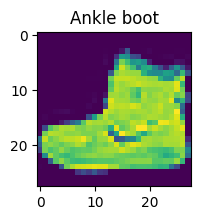

In [8]:
#Printing the image for data visualization
plt.figure(figsize=(2, 2))
plt.imshow(image.squeeze())
plt.title(class_names[label])

In [9]:
#Creating the dataloader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

In [10]:
len(train_dataloader)

1875

In [11]:
len(test_dataloader)

313

In [12]:
#Next we flatten our tensors as linear layers in the nn module work with single vectors
#First attempt at building a solution - linear and non linear layers (Relu())
from torch import nn
class ModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                      nn.Linear(in_features=input_shape, out_features = hidden_units),
                                      nn.ReLU(),
                                      nn.Linear(in_features = hidden_units, out_features = output_shape),
                                      nn.ReLU()
                                      )
    def forward(self, x:torch.Tensor):
      return self.layer_stack(x)

In [13]:
#Next we define the gpu as device to make the process faster
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [14]:
#Flattening the model will cause the vector to be of size 28*28 = 784, so we use input_shape = 784, hidden_units = 10 (arbitrary small number),
#and output_units = len(class_names)

model_0  = ModelV0(input_shape = 784, hidden_units = 10, output_shape = len(class_names)).to(device)


In [15]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0153, -0.0270, -0.0253,  ..., -0.0147,  0.0348, -0.0227],
        [-0.0225,  0.0249,  0.0311,  ..., -0.0242, -0.0175, -0.0125],
        [ 0.0112,  0.0124, -0.0097,  ...,  0.0071,  0.0100, -0.0090],
        ...,
        [ 0.0254, -0.0143,  0.0336,  ..., -0.0257, -0.0095, -0.0163],
        [ 0.0198,  0.0061, -0.0304,  ..., -0.0199, -0.0021,  0.0226],
        [-0.0215,  0.0158, -0.0047,  ...,  0.0068, -0.0092,  0.0122]],
       device='cuda:0', requires_grad=True)

In [16]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [17]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [18]:
#Creating an accuracy function to use later
def accuracy_fn(y_true: torch.Tensor, y_pred: torch.Tensor):
  matches = torch.eq(y_true, y_pred).sum().item()
  return ((matches/len(y_pred))*100)

In [19]:
#Training and testing functions
def train_step(model: torch.nn.Module,
               dataLoader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  train_loss = 0
  train_acc = 0
  for batch, (X,y) in  enumerate(dataLoader):
    X = X.to(device)
    y = y.to(device)

    y_pred = model(x)

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    train_loss/= len(dataLoader)
    train_acc /= len(dataLoader)
    print(f"Train loss: {train_loss:.5f} , Train accuracy: {train_acc:.2f}")

def test_step(model: torch.nn.Module,
              dataLoader: torch.utils.data.DataLoader,
              accuracy_fn,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              device: torch.device = device):
  test_loss = 0
  test_acc = 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in dataLoader:
      X.to(device)
      y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim = 1))

      test_loss /= len(dataLoader)
      test_acc /= len(dataLoader)
      print(f"Test loss: {test_loss:.5f} , Test accuracy: {test_acc:.2f}")